#### red nuronal
    -4 capas


#### algoritmo
    -paso 1: predecir el peso de un niño
    -paso 2: si es menor a 2500gramos tiene bajo peso(LOW=1), si es mayor a 2500gramos no tiene bajo peso(LOW=0)


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

## se importa el dataset de birthweight 1989 (desde el repositoria GitHub del curso, es una archivo .dat)

In [66]:
import requests
url = "https://raw.githubusercontent.com/joanby/tensorflow/master/datasets/birthweight.dat"
birth_file = requests.get(url) 
birth_data = birth_file.text.split("\r\n") ##separa cada fila del dataset

In [67]:
birth_data

['LOW\tAGE\tLWT\tRACE\tSMOKE\tPTL\tHT\tUI\tBWT',
 '1\t28\t113\t1\t1\t1\t0\t1\t709',
 '1\t29\t130\t0\t0\t0\t0\t1\t1021',
 '1\t34\t187\t1\t1\t0\t1\t0\t1135',
 '1\t25\t105\t1\t0\t1\t1\t0\t1330',
 '1\t25\t85\t1\t0\t0\t0\t1\t1474',
 '1\t27\t150\t1\t0\t0\t0\t0\t1588',
 '1\t23\t97\t1\t0\t0\t0\t1\t1588',
 '1\t24\t128\t1\t0\t1\t0\t0\t1701',
 '1\t24\t132\t1\t0\t0\t1\t0\t1729',
 '1\t21\t165\t0\t1\t0\t1\t0\t1790',
 '1\t32\t105\t1\t1\t0\t0\t0\t1818',
 '1\t19\t91\t0\t1\t1\t0\t1\t1885',
 '1\t25\t115\t1\t0\t0\t0\t0\t1893',
 '1\t16\t130\t1\t0\t0\t0\t0\t1899',
 '1\t25\t92\t0\t1\t0\t0\t0\t1928',
 '1\t20\t150\t0\t1\t0\t0\t0\t1928',
 '1\t21\t190\t1\t0\t0\t0\t1\t1928',
 '1\t24\t155\t0\t1\t1\t0\t0\t1936',
 '1\t21\t103\t1\t0\t0\t0\t0\t1970',
 '1\t20\t125\t1\t0\t0\t0\t1\t2055',
 '1\t25\t89\t1\t0\t1\t0\t0\t2055',
 '1\t19\t102\t0\t0\t0\t0\t0\t2082',
 '1\t19\t112\t0\t1\t0\t0\t1\t2084',
 '1\t26\t117\t0\t1\t1\t0\t1\t2084',
 '1\t24\t138\t0\t0\t0\t0\t0\t2100',
 '1\t17\t130\t1\t1\t1\t0\t1\t2125',
 '1\t20\t120\t1\t1\t0

In [68]:
birth_header = birth_data[0].split("\t") ##cabecera del dataset
birth_header

['LOW', 'AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'BWT']

In [69]:
birth_data = [[float(x) for x in y.split("\t") if len(x)>=1] for y in birth_data[1:] if len(y)>=1] ##con esta linea se obtiene los datos limpios fila por fila
birth_data

[[1.0, 28.0, 113.0, 1.0, 1.0, 1.0, 0.0, 1.0, 709.0],
 [1.0, 29.0, 130.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1021.0],
 [1.0, 34.0, 187.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1135.0],
 [1.0, 25.0, 105.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1330.0],
 [1.0, 25.0, 85.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1474.0],
 [1.0, 27.0, 150.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1588.0],
 [1.0, 23.0, 97.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1588.0],
 [1.0, 24.0, 128.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1701.0],
 [1.0, 24.0, 132.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1729.0],
 [1.0, 21.0, 165.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1790.0],
 [1.0, 32.0, 105.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1818.0],
 [1.0, 19.0, 91.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1885.0],
 [1.0, 25.0, 115.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1893.0],
 [1.0, 16.0, 130.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1899.0],
 [1.0, 25.0, 92.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [1.0, 20.0, 150.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [1.0, 21.0, 190.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1928.0],
 [1.0, 24.0, 155.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1936.0],
 [1.0, 21.0, 103.0, 1.0, 0.0, 0.0

In [70]:
len(birth_data)

189

In [71]:
x_vals = np.array([x[1:8] for x in birth_data])
y_vals = np.array([x[8] for x in birth_data])

## se define la semilla de aleatoriedad

In [72]:
seed = 2019
tf.set_random_seed(seed)
np.random.seed(seed)
batch_size = 100

## se separan los datos en conjunto de entrenamiento y test

In [73]:
train_index = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_index = np.array(list(set(range(len(x_vals)))-set(train_index)))
x_vals_train = x_vals[train_index]
y_vals_train = y_vals[train_index]
x_vals_test = x_vals[test_index]
y_vals_test = y_vals[test_index]

## normalizacion de los datos

In [74]:
def normalize_cols(m, col_min = np.array([None]), col_max=np.array([None])):
    if not col_min[0]:
        col_min = m.min(axis=0)
    if not col_max[0]:
        col_max = m.max(axis=0)
    return (m-col_min)/(col_max-col_min), col_min, col_max

In [75]:
x_vals_train, train_min, train_max = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test,_,_ = np.nan_to_num(normalize_cols(x_vals_test, train_min, train_max))

## funciones para definir pesos y bias (se hace asi para no andar escribiendo lo mismo todo el tiempo)

In [76]:
def init_weight(shape, st_dev):
    weight = tf.Variable(tf.random_normal(shape=shape, stddev=st_dev))
    return(weight)

def init_bias(shape, st_dev):
    bias = tf.Variable(tf.random_normal(shape=shape, stddev=st_dev))
    return(bias)

## se definene los placeholders

In [77]:
x_data = tf.placeholder(shape=[None, 7], dtype= tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype= tf.float32)

## se define la operacion (se hace asi para no andar escribiendo lo mismo todo el tiempo)

In [78]:
def full_connected(input_layer, weights, biases):
    layer = tf.add(tf.matmul(input_layer, weights), biases)
    return(layer)

### reduccion de datos(nota: se elige arbitrariamente): 

    
    -capa 1 = entrada=7 datos  ; salida=25 datos ; por lo tanto 7*25+25=200 variables
    -capa 2 = entrada=25 datos ; salida=10 datos ; por lo tanto 25*10+10 = 260 variables
    -capa 3 = entrada=10 datos ; salida=3 datos  ; por lo tanto 10*3+3 = 33 variables
    -capa 4 = entrada=3 datos  ; salida=1 dato   ; por lo tanto 3*1+1 = 4 variables
    
en total la red neuronal tiene que estimar 200+260+33+4 = 497 variables

## construccion de capas

In [79]:
# capa 1 = entrada=7 datos  ; salida=25 datos
w1 = init_weight(shape=[7,25], st_dev=10.0)
b1 = init_bias(shape=[25], st_dev=10.0)
layer1 = full_connected(x_data, w1, b1)

# capa 2 = entrada=25 datos ; salida=10 datos
w2 = init_weight(shape=[25,10], st_dev=10.0)
b2 = init_bias(shape=[10], st_dev=10.0)
layer2 = full_connected(layer1, w2, b2)

# capa 3 = entrada=10 datos ; salida=3 datos
w3 = init_weight(shape=[10,3], st_dev=10.0)
b3 = init_bias(shape=[3], st_dev=10.0)
layer3 = full_connected(layer2, w3, b3)

# capa 4 = entrada=3 datos  ; salida=1 dato 
w4 = init_weight(shape=[3,1], st_dev=10.0)
b4 = init_bias(shape=[1], st_dev=10.0)
layer4 = full_connected(layer3, w4, b4)

## funcion de perdida

In [80]:
loss = tf.reduce_mean(tf.abs(y_target-layer4))

## optimizador

In [81]:
optimizador = tf.train.AdamOptimizer(learning_rate=0.05)
train_step = optimizador.minimize(loss)

## inicializan variables

In [82]:
init = tf.global_variables_initializer()
session.run(init)

## entrenamiento del modelo

In [83]:
train_loss = []
test_loss = []
for i in range(300):
    rand_index = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_loss_train = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    train_loss.append(temp_loss_train)
    
    temp_loss_test = session.run(loss, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
    test_loss.append(temp_loss_test)
    
    if(i+1)%25==0:
        print("paso="+str(i+1)+ ", loss="+str(temp_loss_train))

paso=25, loss=19638.654
paso=50, loss=5281.0737
paso=75, loss=1081.7251
paso=100, loss=752.5994
paso=125, loss=1206.4
paso=150, loss=1017.2442
paso=175, loss=2367.9639
paso=200, loss=990.2377
paso=225, loss=615.92365
paso=250, loss=857.9517
paso=275, loss=724.70306
paso=300, loss=892.7468


## grafico de funcion de perdidas

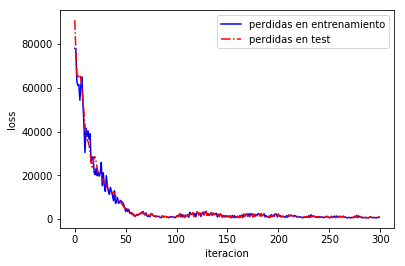

In [84]:
plt.plot(train_loss, "b-", label="perdidas en entrenamiento")
plt.plot(test_loss, "r-.", label="perdidas en test")
plt.xlabel("iteracion")
plt.ylabel("loss")
plt.legend(loc="upper right")
plt.show()

## porcentaje de aciertos en train y test

In [89]:
actuals = np.array([x[0] for x in birth_data])
train_actuals = actuals[train_index]
test_actuals = actuals[test_index]

train_preds = [x[0] for x in session.run(layer4, feed_dict={x_data:x_vals_train})]
train_preds = np.array([1.0 if x<2500.0 else 0.0 for x in train_preds])

test_preds = [x[0] for x in session.run(layer4, feed_dict={x_data:x_vals_test})]
test_preds = np.array([1.0 if x<2500.0 else 0.0 for x in test_preds])

In [90]:
train_acc = np.mean([x==y for x,y in zip(train_preds, train_actuals)])
test_acc = np.mean([x==y for x,y in zip(test_preds, test_actuals)])

In [91]:
train_acc # porcentaje de aciertos en train

0.6026490066225165

In [92]:
test_acc # porcentaje de aciertos en test

0.5